In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
org_df = pd.read_csv("../datasets/cardio_data_processed.csv")

In [3]:
df = org_df.copy()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
del df["bp_category_encoded"]
del df["id"]
del df["age"]

In [6]:
df.bp_category = df.bp_category.str.lower().str.replace(" ","_")

In [7]:
df.bp_category.unique()

array(['hypertension_stage_1', 'hypertension_stage_2', 'normal',
       'elevated'], dtype=object)

In [8]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [9]:
df.describe().round()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0,68205.0
mean,1.0,164.0,74.0,126.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,53.0,28.0
std,0.0,8.0,14.0,16.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0
min,1.0,55.0,11.0,90.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,29.0,3.0
25%,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,48.0,24.0
50%,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,53.0,26.0
75%,2.0,170.0,82.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0,58.0,30.0
max,2.0,250.0,200.0,180.0,120.0,3.0,3.0,1.0,1.0,1.0,1.0,64.0,299.0


In [10]:
# Check or is na in Columns
df.columns[df.isnull().any()].tolist()

[]

# EDA 

In [11]:


gluc = {
    1: 'normal',
    2: 'above_normal',
    3: 'well_above_normal'
}

df.gluc = df.gluc.map(gluc)

smoking = {
    1: 'no',
    0: 'yes',
}

df.smoke = df.smoke.map(smoking)

alco = {
    1: 'yes',
    0: 'no',
}

df.alco = df.alco.map(alco)


active = {
    1: 'yes',
    0: 'no',
}

df.active = df.active.map(alco)


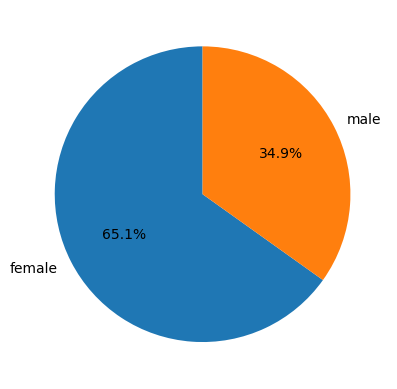

In [12]:
plt.pie(df['gender'].value_counts(), labels=['female', 'male'], autopct='%1.1f%%', startangle=90);

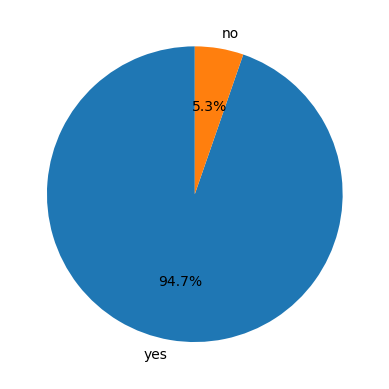

In [13]:
plt.pie(df['alco'].value_counts(), labels=['yes', 'no'], autopct='%1.1f%%', startangle=90);

<Axes: xlabel='age_years'>

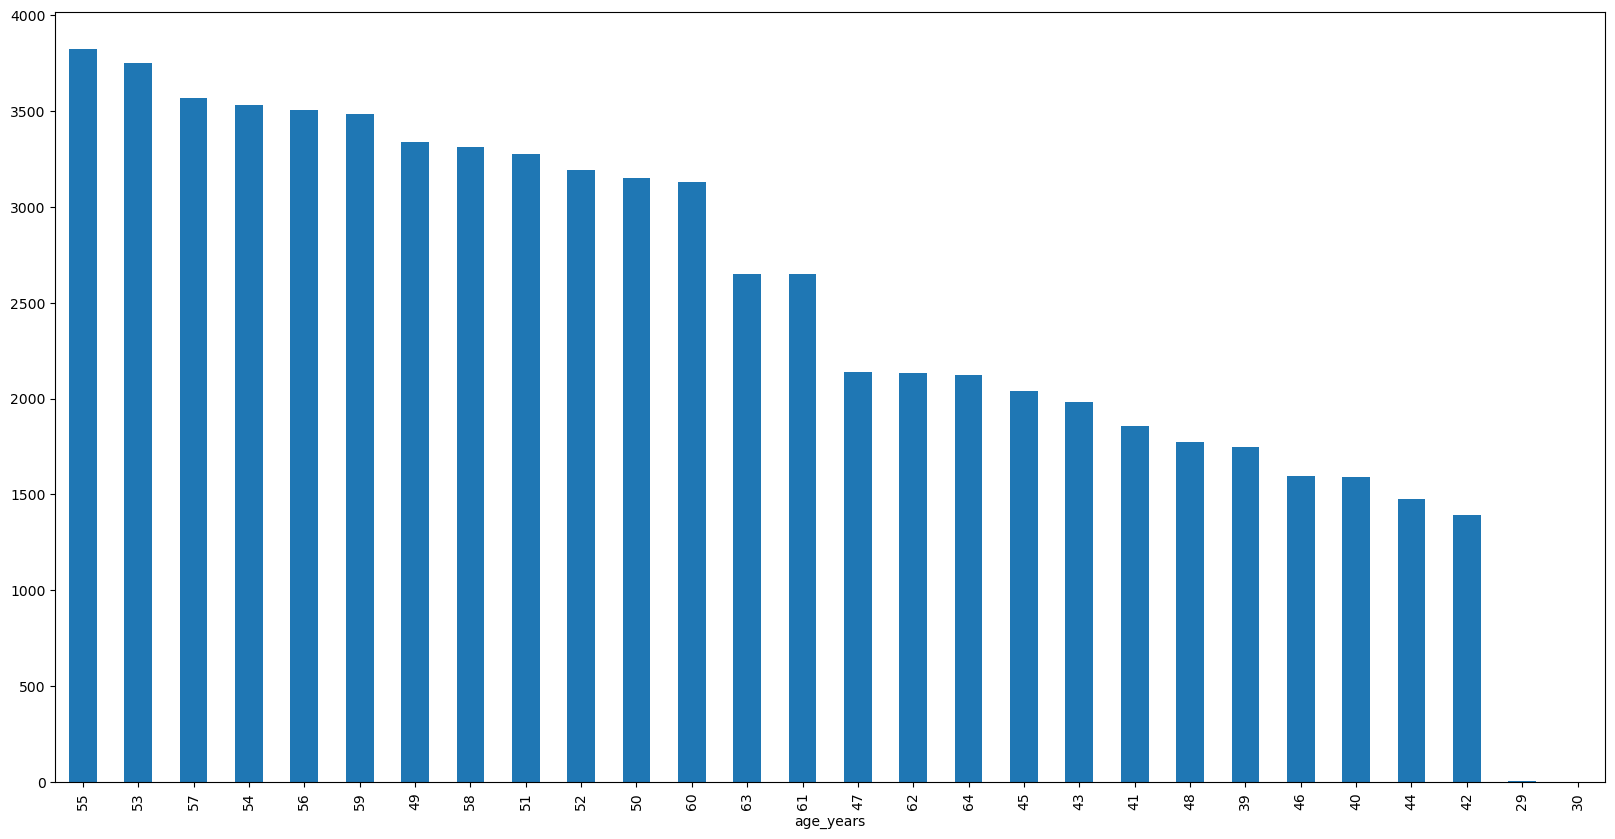

In [14]:
df['age_years'].value_counts().plot(kind='bar', figsize=(20,10))

In [15]:
df.describe().columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'cardio',
       'age_years', 'bmi'],
      dtype='object')

In [16]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,normal,yes,no,yes,0,50,21.967120,hypertension_stage_1
1,1,156,85.0,140,90,3,normal,yes,no,yes,1,55,34.927679,hypertension_stage_2
2,1,165,64.0,130,70,3,normal,yes,no,no,1,51,23.507805,hypertension_stage_1
3,2,169,82.0,150,100,1,normal,yes,no,yes,1,48,28.710479,hypertension_stage_2
4,1,156,56.0,100,60,1,normal,yes,no,no,0,47,23.011177,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,normal,no,no,yes,0,52,26.927438,hypertension_stage_1
68201,1,158,126.0,140,90,2,above_normal,yes,no,yes,1,61,50.472681,hypertension_stage_2
68202,2,183,105.0,180,90,3,normal,yes,yes,no,1,52,31.353579,hypertension_stage_2
68203,1,163,72.0,135,80,1,above_normal,yes,no,no,1,61,27.099251,hypertension_stage_1


In [17]:
columns = list(df.columns)

columns

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'age_years',
 'bmi',
 'bp_category']

# Train

In [18]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.cardio.values
y_val = df_val.cardio.values
y_test = df_test.cardio.values

In [21]:
del df_train['cardio']
del df_val['cardio']
del df_test['cardio']

In [22]:
df_full_train.cardio.value_counts(normalize=True)

cardio
0    0.50581
1    0.49419
Name: proportion, dtype: float64

In [23]:
from sklearn.metrics import mutual_info_score
for col in df_full_train.columns:

    print(f"{col}-->>",mutual_info_score(df_full_train.cardio,df_full_train[col]))
    

gender-->> 2.669988223491515e-05
height-->> 0.0013101998141547974
weight-->> 0.019766113720978556
ap_hi-->> 0.11689753104369419
ap_lo-->> 0.0707354901253279
cholesterol-->> 0.02498817491025347
gluc-->> 0.004353457147597994
smoke-->> 8.510230503794292e-05
alco-->> 4.833382552464627e-05
active-->> 0.0006669282476497174
cardio-->> 0.693079674013221
age_years-->> 0.031784427134642135


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


bmi-->> 0.058188618811005496
bp_category-->> 0.07329385879224032


In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

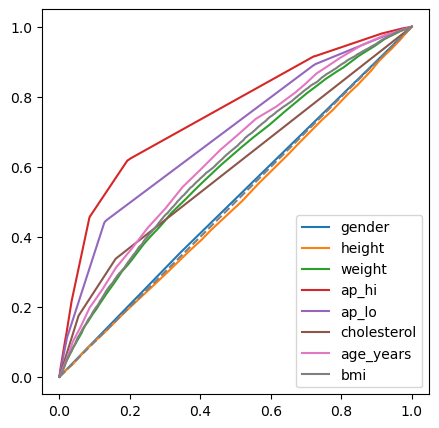

In [25]:
plt.figure(figsize=(5, 5))

for col in df_train.describe().columns:
    fpr, tpr, _ = roc_curve(y_train, df_train[col])
    plt.plot(fpr, tpr, label=col)
    
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [27]:
columns = list(df.columns)


columns.remove("cardio")
columns.remove("bmi")

In [28]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

# y_pred = model.predict_proba(X_val)[:, 1]
# roc_auc_score(y_test, y_pred)

0.7728472877546158

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred >= 0.5)

0.5136720181804854

In [33]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.490
0.05 0.490
0.10 0.496
0.15 0.516
0.20 0.548
0.25 0.591
0.30 0.636
0.35 0.676
0.40 0.698
0.45 0.710
0.50 0.713
0.55 0.706
0.60 0.697
0.65 0.686
0.70 0.668
0.75 0.646
0.80 0.620
0.85 0.590
0.90 0.555
0.95 0.524
1.00 0.510


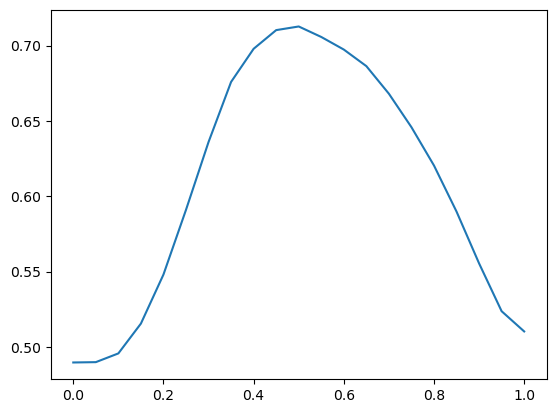

In [34]:
plt.plot(thresholds, scores)


In [35]:
def calculate_confusion_matrix(y_val,y_pred):
    threshold = np.linspace(0,1,num=101).round(2)
    matrix = []
    for t in threshold:
        
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
    
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        confusion_matrix = np.array([
            [tn, fp],
            [fn, tp]
        ])
        columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
        matrix.append([t,tp,fp,fn,tn])
    confusion_matrix = pd.DataFrame(matrix,columns=columns)
    return confusion_matrix
df_confusion_matrix = calculate_confusion_matrix(y_val,y_pred)
df_confusion_matrix[::10]

,threshold,tp,fp,fn,tn
0,0.0,6680,6961,0,0
10,0.1,6673,6872,7,89
20,0.2,6516,6001,164,960
30,0.3,5992,4277,688,2684
40,0.4,5142,2583,1538,4378
50,0.5,4267,1506,2413,5455
60,0.6,3491,939,3189,6022
70,0.7,2767,615,3913,6346
80,0.8,1873,371,4807,6590
90,0.9,756,140,5924,6821


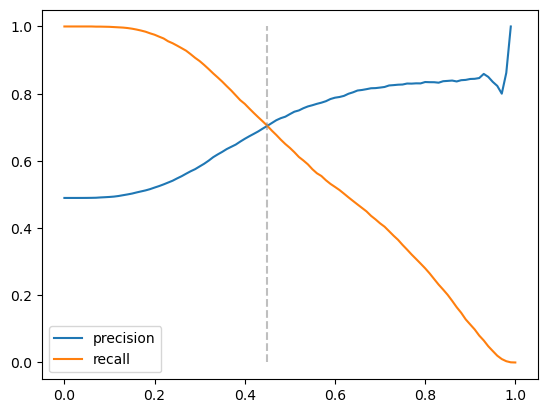

In [36]:
df_confusion_matrix['p'] = df_confusion_matrix.tp / (df_confusion_matrix.tp + df_confusion_matrix.fp)
df_confusion_matrix['r'] = df_confusion_matrix.tp / (df_confusion_matrix.tp + df_confusion_matrix.fn)


plt.plot(df_confusion_matrix.threshold, df_confusion_matrix.p, label='precision')
plt.plot(df_confusion_matrix.threshold, df_confusion_matrix.r, label='recall')

plt.vlines(0.45, 0, 1, color='grey', linestyle='--', alpha=0.5)


plt.legend()
plt.show()

# K Fold CV

In [37]:
from sklearn.model_selection import KFold

In [38]:
def train(col,df_train, y_train, C=1.0):
    dicts = df_train[col].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(col,df, dv, model):
    dicts = df[col].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [39]:
columns

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'bp_category']

In [40]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.cardio.values
    y_val = df_val.cardio.values
    

    dv, model = train(columns,df_train, y_train, C=15)
    y_pred = predict(columns,df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.793 +- 0.002


In [41]:
!pip install tqdm

In [42]:
from tqdm.auto import tqdm

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in tqdm([0.01, 0.1,0.5,10,15,20,25,30,40,50,60,80,100]):
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.cardio.values
        y_val = df_val.cardio.values

        dv, model = train(columns,df_train, y_train, C=C)
        y_pred = predict(columns,df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/13 [00:00<?, ?it/s]

C=0.01, 0.784 +- 0.003
C= 0.1, 0.792 +- 0.002
C= 0.5, 0.793 +- 0.002
C=  10, 0.793 +- 0.002
C=  15, 0.793 +- 0.002
C=  20, 0.793 +- 0.002
C=  25, 0.793 +- 0.002
C=  30, 0.793 +- 0.002
C=  40, 0.793 +- 0.002
C=  50, 0.793 +- 0.002
C=  60, 0.793 +- 0.002
C=  80, 0.793 +- 0.002
C= 100, 0.793 +- 0.002


# XG Boost 

In [44]:
!pip install xgboost

In [45]:
import xgboost as xgb

In [46]:

def train_xgBoost(xgb_params,num_boost_round,df_train,df_val,y_val,):
    train_dicts = df_train.fillna(0).to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val.fillna(0).to_dict(orient='records')
    X_val = dv.fit_transform(val_dicts)

    features = dv.feature_names_
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

    
    watchlist = [(dtrain, 'train'), (dval, 'val')]
    model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=5,evals=watchlist)
    return model

In [47]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
y_train = df_train.cardio.values
y_val = df_val.cardio.values
y_test = df_test.cardio.values

In [50]:
del df_train['cardio']
del df_val['cardio']
del df_test['cardio']

In [51]:
df_train

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
0,1,169,85.0,120,80,2,normal,yes,no,yes,50,29.760863,hypertension_stage_1
1,1,158,69.0,100,60,1,normal,yes,no,yes,53,27.639801,normal
2,1,162,65.0,120,80,2,above_normal,yes,no,yes,43,24.767566,hypertension_stage_1
3,1,163,65.0,120,80,1,normal,yes,no,no,49,24.464602,hypertension_stage_1
4,1,154,110.0,120,80,1,normal,yes,no,yes,61,46.382189,hypertension_stage_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40918,2,168,70.0,130,80,3,normal,no,no,yes,52,24.801587,hypertension_stage_1
40919,1,149,66.0,160,90,1,normal,yes,no,yes,42,29.728391,hypertension_stage_2
40920,1,156,93.0,140,80,1,normal,yes,no,yes,47,38.214990,hypertension_stage_1
40921,2,176,85.0,120,80,1,normal,yes,no,yes,43,27.440599,hypertension_stage_1


In [52]:
%%capture output
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    # 'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 1,
    }



model=train_xgBoost(xgb_params,500,df_train,df_val,y_val)



In [53]:
dv = DictVectorizer(sparse=False)
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)




0.8000551404015701

In [54]:
s= output.stdout


In [55]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [56]:
df_score = parse_xgb_output(output)

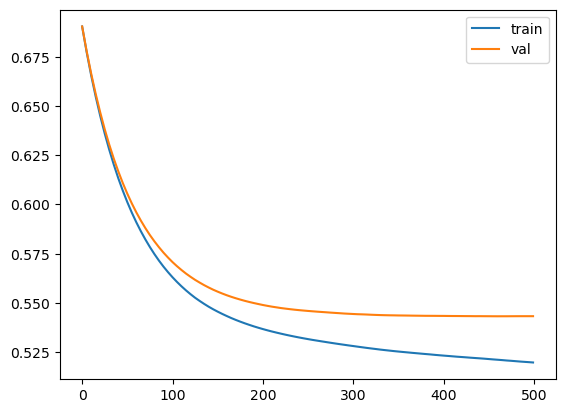

In [57]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

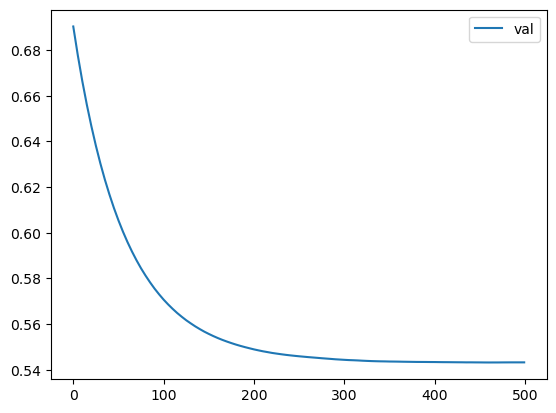

In [58]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# Test

In [59]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.fit_transform(test_dicts)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.7975150612804647

In [60]:
df_confusion_matrix = calculate_confusion_matrix(y_test,y_pred)
df_confusion_matrix[::10]


,threshold,tp,fp,fn,tn
0,0.0,6707,6934,0,0
10,0.1,6686,6624,21,310
20,0.2,6443,5234,264,1700
30,0.3,5857,3597,850,3337
40,0.4,5173,2274,1534,4660
50,0.5,4590,1519,2117,5415
60,0.6,3975,994,2732,5940
70,0.7,3499,737,3208,6197
80,0.8,2885,542,3822,6392
90,0.9,63,13,6644,6921


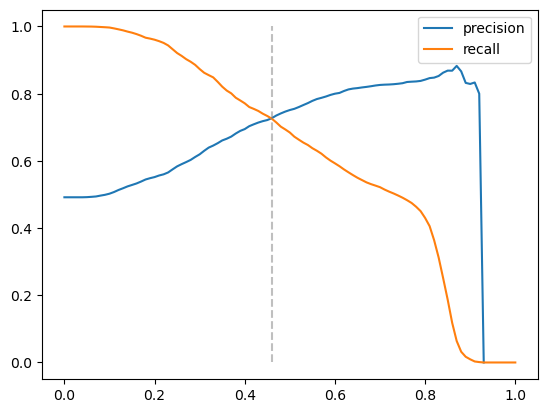

In [61]:
df_confusion_matrix['p'] = df_confusion_matrix.tp / (df_confusion_matrix.tp + df_confusion_matrix.fp)
df_confusion_matrix['r'] = df_confusion_matrix.tp / (df_confusion_matrix.tp + df_confusion_matrix.fn)


plt.plot(df_confusion_matrix.threshold, df_confusion_matrix.p, label='precision')
plt.plot(df_confusion_matrix.threshold, df_confusion_matrix.r, label='recall')

plt.vlines(0.46, 0, 1, color='grey', linestyle='--', alpha=0.5)


plt.legend()
plt.show()

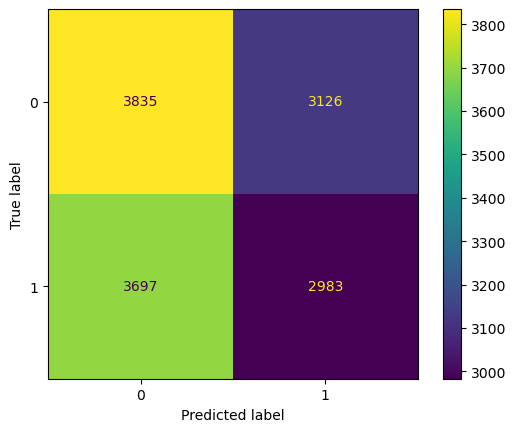

In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()